In [1]:
import os, pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from aix360.algorithms.protodash import ProtodashExplainer
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0)

In [4]:
model, name = 'dwac', 'emb10.merged2.conv'
train_path = '../data/bm/embs/{}_train_{}.pkl'.format(model, name)
valid_path = '../data/bm/embs/{}_valid_{}.pkl'.format(model, name)
f_train, _, y_train, X_train = pickle.load(open(train_path, "rb"))
f_valid, _, y_valid, X_valid = pickle.load(open(valid_path, "rb"))

In [5]:
protodash = ProtodashExplainer()
_, index, _ = protodash.explain(X_train, X_train, m=5)
index, f_train[index], y_train[index]

(array([119,  42,  56, 105,  48]),
 array(['139.jpg', '56.jpg', '69.jpg', '125.jpg', '61.jpg'], dtype='<U7'),
 array([1, 0, 0, 1, 0]))

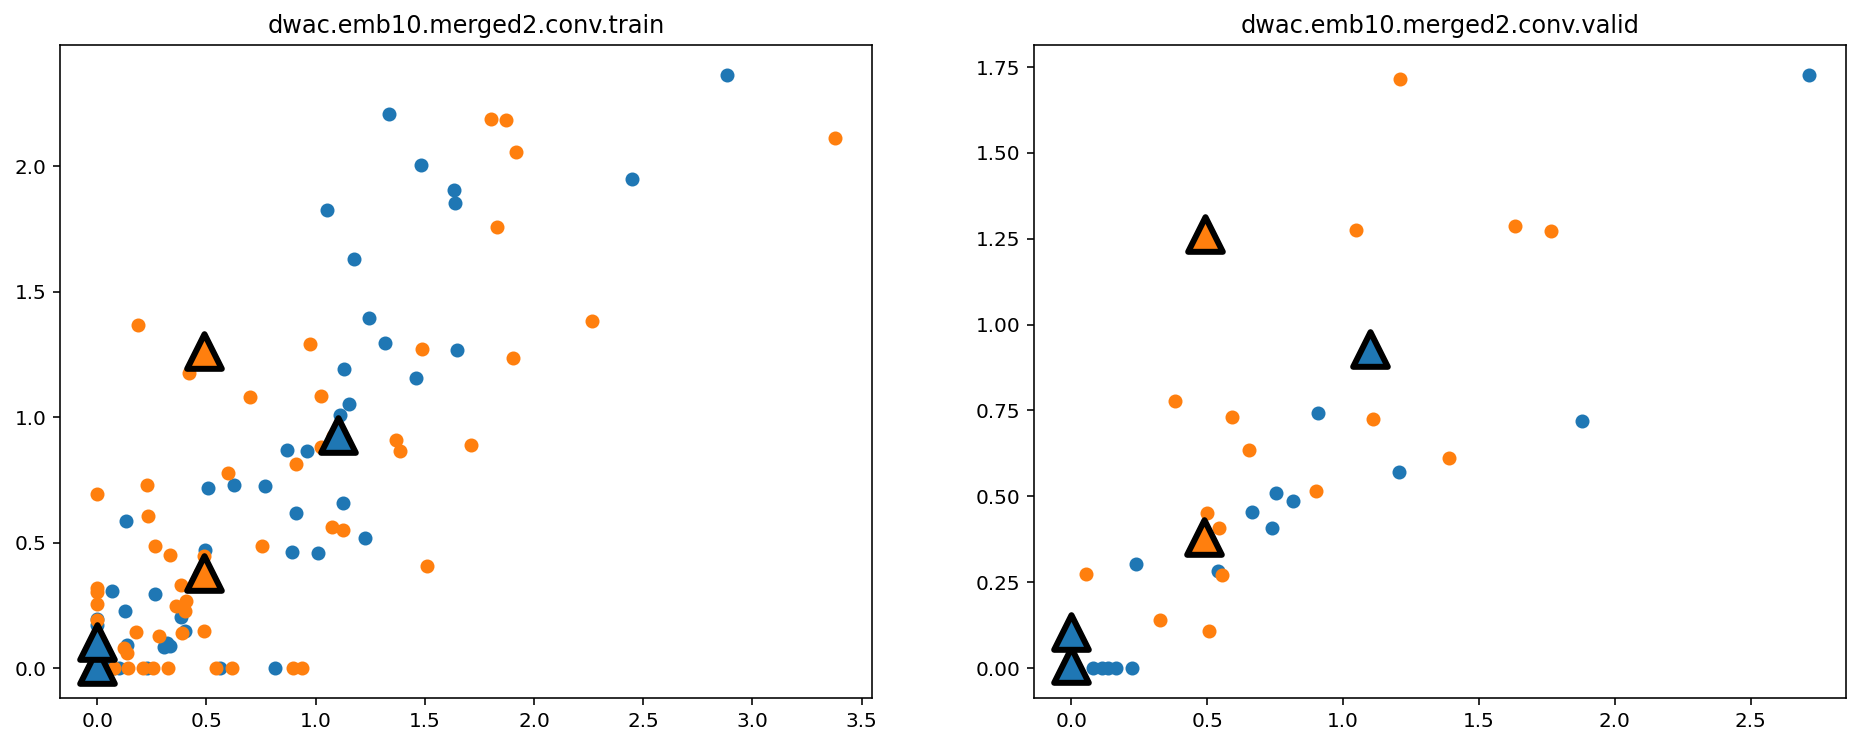

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for i, data in enumerate([(X_train, y_train), (X_valid, y_valid)]):
    vis, labels = data
    neg_id = np.where(labels==0)[0]
    pos_id = np.where(labels==1)[0]
    a_id, b_id = neg_id, pos_id
    ax[i].scatter(vis[a_id][:,0], vis[a_id][:,1])    
    ax[i].scatter(vis[b_id][:,0], vis[b_id][:,1])
    ax[i].set_title("{}.{}.{}".format(model, name, "train" if i == 0 else "valid"))
for i in range(len(ax)):
    a_proto = X_train[[i for i in index if y_train[i] < 1]]
    b_proto = X_train[[i for i in index if y_train[i] > 0]]
    ax[i].scatter(a_proto[:,0], a_proto[:,1], s=300, c='C0', marker='^', linewidths=3, edgecolors='k')    
    ax[i].scatter(b_proto[:,0], b_proto[:,1], s=300, c='C1', marker='^', linewidths=3, edgecolors='k')